Geschätzte Masse: 1.042792257409915 kg
Geschätzte Federkonstante: 99.49458234503533 N/m
Geschätzte Dämpfungskonstante: 5.0003513534571775 Ns/m


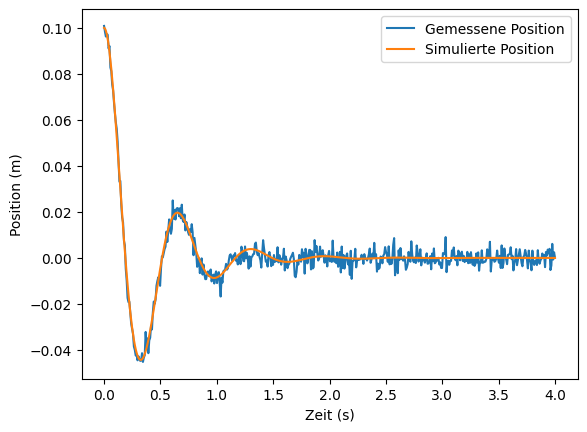

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import least_squares

# Systemparameter
masse = 1.0  # kg
feder = 100.0  # N/m
daempfer = 5.0  # Ns/m

# DGL-Koeffizienten
a_2_g = masse
a_1_g = daempfer
a_0_g = feder

# Zustandsvektor
def dxdt(x, t, a_0, a_1, a_2):
  x_dot = np.zeros_like(x)
  x_dot[0] = x[1]
  x_dot[1] = -a_0/a_2 * x[0] - a_1/a_2 * x[1]
  return x_dot

# Parameterschätzung

# Zielfunktion: Fehler zwischen simulierter und tatsächlicher Position
def residuals(params, t, position):
  a_0, a_1, a_2 = params
  position_sim = odeint(dxdt, [0.1, 0.0], t, args=(a_0, a_1, a_2))[:, 0]
  return position_sim - position

# Zeitspanne und Positionsdaten
t_span = np.linspace(0, 4, 500)
position_true = odeint(dxdt, [0.1, 0.0], t_span, args=(a_0_g, a_1_g, a_2_g))[:, 0]

# Rauschen hinzufügen (optional)
position_true += np.random.randn(len(position_true)) * 0.003

# Parameter initialisieren
params_guess = np.array([a_0_g, a_1_g, a_2_g])

# Optimierungsproblem definieren und lösen
result = least_squares(residuals, params_guess, args=(t_span, position_true))

# Geschätzte Parameter extrahieren
a_0_est, a_1_est, a_2_est = result.x

# Masse berechnen
masse_est = 1.0 / a_2_est

# Ausgabe der Ergebnisse
print("Geschätzte Masse:", masse_est, "kg")
print("Geschätzte Federkonstante:", a_0_est * masse_est, "N/m")
print("Geschätzte Dämpfungskonstante:", a_1_est * masse_est, "Ns/m")

# Visualisierung der Position
plt.plot(t_span, position_true, label="Gemessene Position")
plt.plot(t_span, odeint(dxdt, [0.1, 0.0], t_span, args=(a_0_est, a_1_est, a_2_est))[:, 0], label="Simulierte Position")
plt.xlabel("Zeit (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.show()


Estimated mass: 0.43289139443835134 kg
Estimated spring constant: 100.08873231205264 N/m
Estimated damping constant: 5.015218194463111 Ns/m


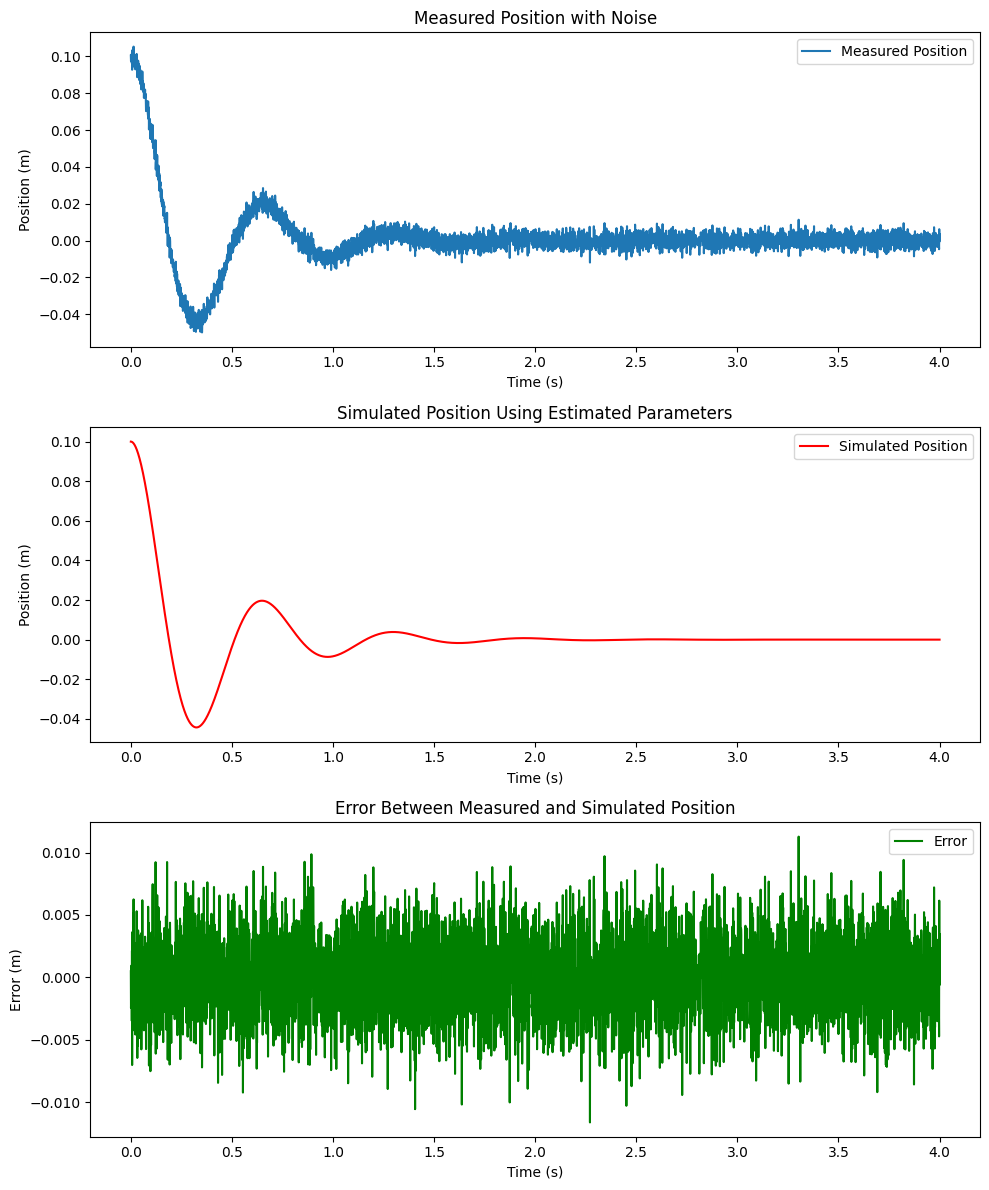

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import least_squares

# System parameters
masse = 1.0  # kg
feder = 100.0  # N/m
daempfer = 5.0  # Ns/m

# DGL coefficients
a_2_g = masse
a_1_g = daempfer
a_0_g = feder

# State vector
def dxdt(x, t, a_0, a_1, a_2):
    x_dot = np.zeros_like(x)
    x_dot[0] = x[1]
    x_dot[1] = -a_0/a_2 * x[0] - a_1/a_2 * x[1]
    return x_dot

# Function for residuals: difference between simulated and actual position
def residuals(params, t, position):
    a_0, a_1, a_2 = params
    position_sim = odeint(dxdt, [0.1, 0.0], t, args=(a_0, a_1, a_2))[:, 0]
    return position_sim - position

# Time span and position data
t_span = np.linspace(0, 4, 5000)
position_true = odeint(dxdt, [0.1, 0.0], t_span, args=(a_0_g, a_1_g, a_2_g))[:, 0]

# Adding noise (optional)
position_true += np.random.randn(len(position_true)) * 0.003

# Initialize parameters
params_guess = np.array([a_0_g, a_1_g, a_2_g])

# Adding a random offset to each element in the params_guess array
# For this example, let's use a uniform distribution to generate random offsets in the range [-0.5, 0.5)
random_offsets = np.random.uniform(0, 5, params_guess.shape)

params_guess = params_guess + random_offsets

# Define and solve optimization problem
result = least_squares(residuals, params_guess, args=(t_span, position_true))

# Extract estimated parameters
a_0_est, a_1_est, a_2_est = result.x

# Calculating mass
masse_est = 1.0 / a_2_est

# Output results
print("Estimated mass:", masse_est, "kg")
print("Estimated spring constant:", a_0_est * masse_est, "N/m")
print("Estimated damping constant:", a_1_est * masse_est, "Ns/m")

# Visualization with subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Measured position with noise
axs[0].plot(t_span, position_true, label="Measured Position")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Position (m)")
axs[0].legend()
axs[0].set_title("Measured Position with Noise")

# Simulated position using estimated parameters
position_sim_est = odeint(dxdt, [0.1, 0.0], t_span, args=(a_0_est, a_1_est, a_2_est))[:, 0]
axs[1].plot(t_span, position_sim_est, 'r', label="Simulated Position")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Position (m)")
axs[1].legend()
axs[1].set_title("Simulated Position Using Estimated Parameters")

# Error between measured and simulated position
error = position_true - position_sim_est
axs[2].plot(t_span, error, 'g', label="Error")
axs[2].set_xlabel("Time (s)")
axs[2].set_ylabel("Error (m)")
axs[2].legend()
axs[2].set_title("Error Between Measured and Simulated Position")

plt.tight_layout()
plt.show()


Estimated mass: 0.9632124687318773 kg
Estimated spring constant: 99.9770862884538 N/m
Estimated damping constant: 2.961971412888429 Ns/m


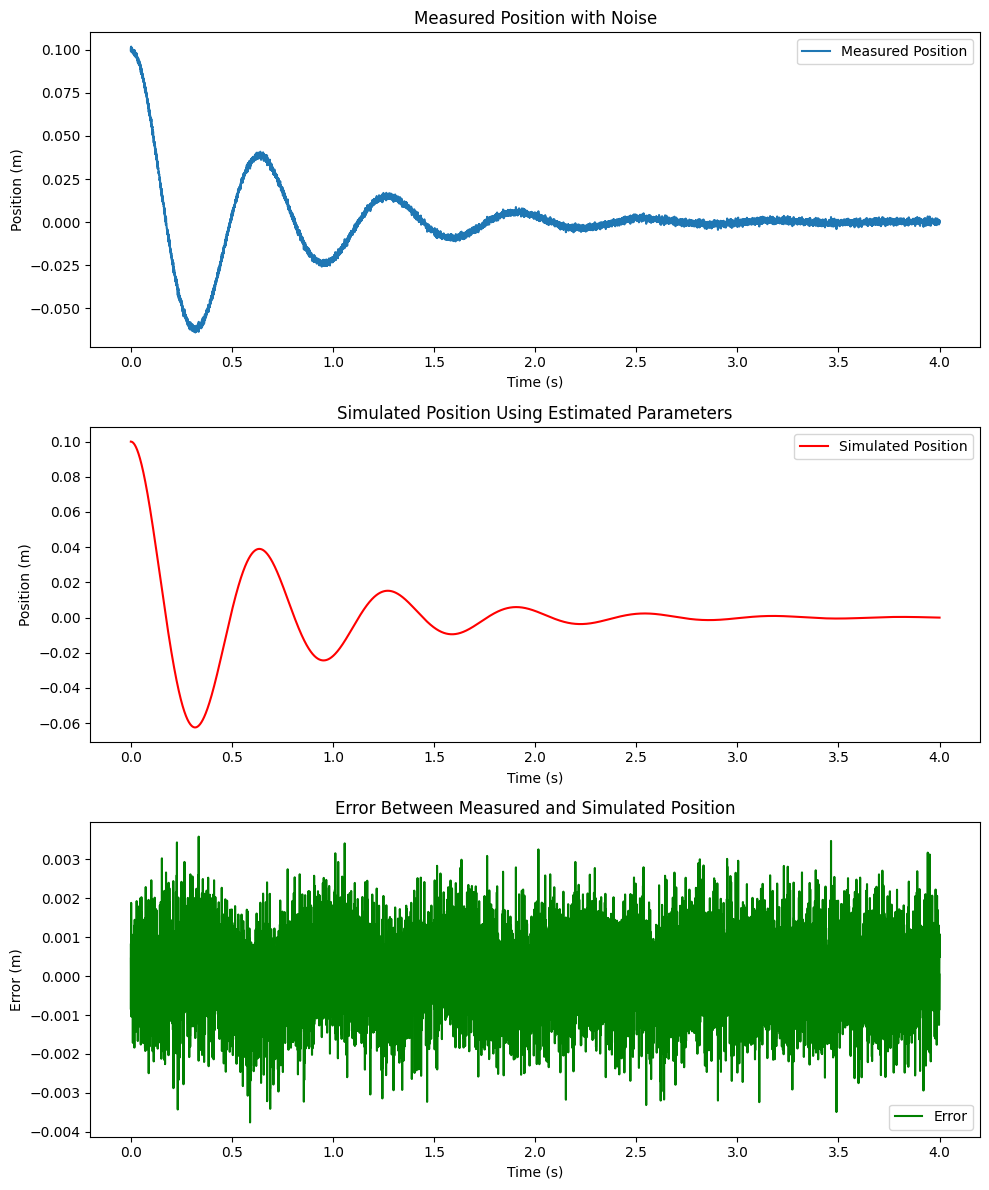

In [0]:
# Import necessary libraries for numerical computations and plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import least_squares

# System parameters
mass = 1.0  # Mass in kilograms
spring_constant = 100.0  # Spring constant in Newtons per meter (N/m)
damping_constant = 3.0  # Damping constant in Newton-seconds per meter (Ns/m)

# Coefficients for the differential equation
coeff_mass = mass
coeff_damping = damping_constant
coeff_spring = spring_constant

# Function to calculate the derivative of the state vector
def state_derivative(state, time, spring, damping, mass):
    derivative = np.zeros_like(state)
    derivative[0] = state[1]
    derivative[1] = -spring/mass * state[0] - damping/mass * state[1]
    return derivative

# Function to calculate residuals: the difference between simulated and actual positions
def residuals(parameters, time, actual_position):
    spring, damping, mass = parameters
    simulated_position = odeint(state_derivative, [0.1, 0.0], time, args=(spring, damping, mass))[:, 0]
    return simulated_position - actual_position

# Time span and true position data
time_span = np.linspace(0, 4, 10000)
true_position = odeint(state_derivative, [0.1, 0.0], time_span, args=(coeff_spring, coeff_damping, coeff_mass))[:, 0]

# Optionally add noise to the true position data
true_position += np.random.randn(len(true_position)) * 0.001

# Initialize guess for the parameters
initial_parameters = np.array([coeff_spring, coeff_damping, coeff_mass])

# Add a random offset to each element in the initial_parameters array using a uniform distribution
random_offsets = np.random.uniform(0, 1, initial_parameters.shape)
initial_parameters += random_offsets

# Define and solve the optimization problem to estimate parameters
optimization_result = least_squares(residuals, initial_parameters, args=(time_span, true_position))

# Extract the estimated parameters
estimated_spring, estimated_damping, estimated_mass = optimization_result.x

# Calculating estimated mass
estimated_mass_value = 1.0 / estimated_mass

# Output the results
print("Estimated mass:", estimated_mass_value, "kg")
print("Estimated spring constant:", estimated_spring * estimated_mass_value, "N/m")
print("Estimated damping constant:", estimated_damping * estimated_mass_value, "Ns/m")

# Visualization with subplots for measured position, simulated position, and the error between them
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot measured position with noise
axes[0].plot(time_span, true_position, label="Measured Position")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Position (m)")
axes[0].legend()
axes[0].set_title("Measured Position with Noise")

# Plot simulated position using estimated parameters
simulated_position_estimated = odeint(state_derivative, [0.1, 0.0], time_span, args=(estimated_spring, estimated_damping, estimated_mass))[:, 0]
axes[1].plot(time_span, simulated_position_estimated, 'r', label="Simulated Position")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Position (m)")
axes[1].legend()
axes[1].set_title("Simulated Position Using Estimated Parameters")

# Plot the error between measured and simulated positions
error = true_position - simulated_position_estimated
axes[2].plot(time_span, error, 'g', label="Error")
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Error (m)")
axes[2].legend()
axes[2].set_title("Error Between Measured and Simulated Position")

plt.tight_layout()
plt.show()
